In [ ]:
import pandas as pd
import numpy as np
import string

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import spacy

import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
import pandas as pd
from datasets import load_dataset

# Завантажую датасет
dataset = load_dataset('mavinsao/reddit-mental-illness-82')
df = dataset['train'].to_pandas()
df['text'] = df['text'].str.lower()
# Фільтрую рядки за наявністю ключових слів (де людина має припущення про хворобу, але точно не знає)
keywords = [
    "think i have",
    "i think i have",
    "i think it might be",
    "i think i could have",
    "might have",
    "i might have",
    "might be",
    "feel like i have",
    "i feel like i have",
    "feels like i have",
    "self-diagnose",
    "self-diagnosed",
    "i've self-diagnosed",
    "unsure if i have",
    "i'm unsure if",
    "unsure if this is",
    "wonder if i have",
    "i wonder if i have",
    "wonder if it's",
    "symptoms of",
    "i have symptoms of",
    "experiencing symptoms of",
    "suspect i have",
    "i suspect i have",
    "i suspect it's",
    "probably have",
    "i probably have",
    "i think i probably have",
    "could be",
    "it could be",
    "seems like i have",
    "it seems like i have",
    "it seems like",
    "not diagnosed but",
    "i am not diagnosed but",
    "i haven't been diagnosed but"
]

df = df[~df['text'].str.contains('|'.join(keywords), case=False, na=False)]

print(df)



                                                    text  label
0      fantasizing about your fp: do you do it? what ...      3
1      this is a support subreddit for people with a ...      6
2      scared of my psychotic symptoms : i'm trying t...      2
4      i feel like a sick animal that needs to be put...      4
5      is constantly checking ocd subreddits a compul...      6
...                                                  ...    ...
42108  16m suicidal, lonely, need to feel loved befor...      4
42109  got asked on a date! : and by a girl i already...      1
42110  i just found out my friend killed herself. : i...      3
42111  family letter detailing the conditions and lib...      5
42112  i'm very proud of myself today : i had an exam...      3

[38469 rows x 2 columns]


In [ ]:
df = dataset['train'].to_pandas()

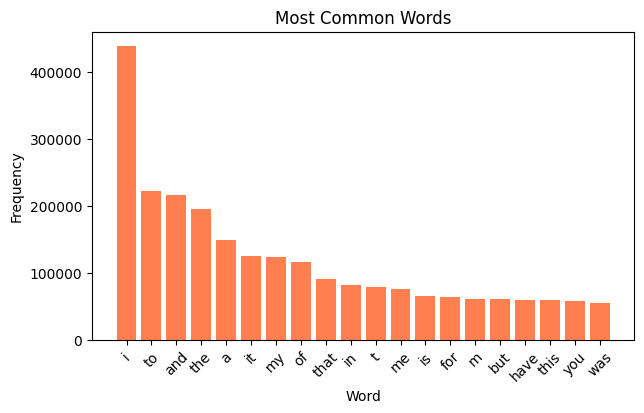

In [ ]:
from collections import Counter
import re

def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

words = [word for text in dataset['train']['text'] for word in tokenize(text)]
common_words = Counter(words).most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(7, 4))
plt.bar(words, counts, color='coral')
plt.title('Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


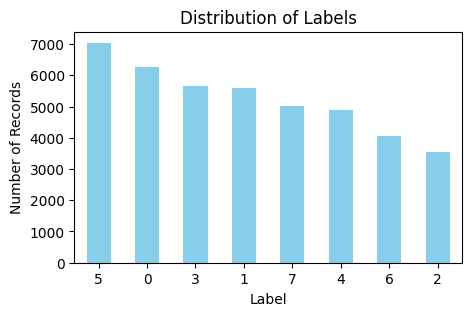

In [ ]:

label_counts = df['label'].value_counts()
plt.figure(figsize=(5, 3))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.show()

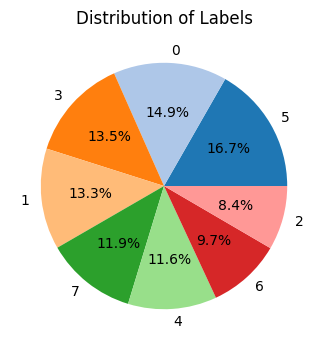

In [ ]:
import matplotlib.pyplot as plt

# Отримання кількостей міток
label_counts = df['label'].value_counts()

# Побудова кругової діаграми
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=plt.get_cmap('tab20').colors)
plt.title('Distribution of Labels')
plt.show()


In [ ]:
df['text'] = df['text'].fillna('')

In [ ]:
missing_values = df.isnull().sum()
missing_values

text     0
label    0
dtype: int64

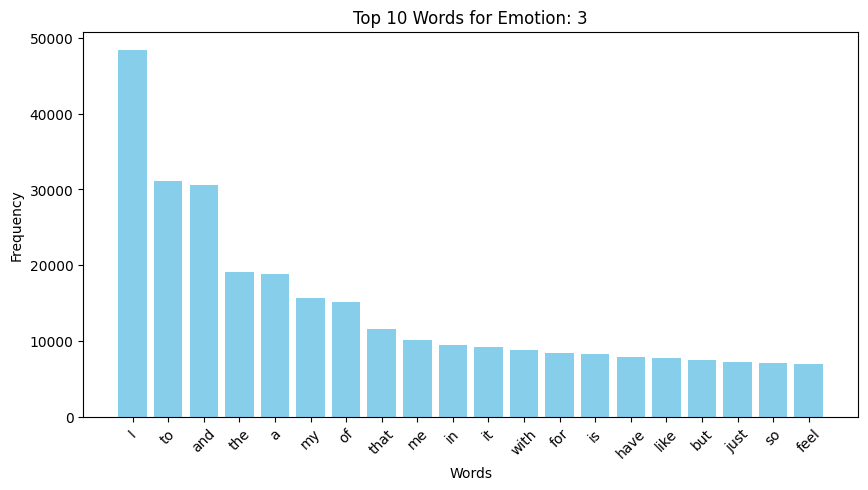

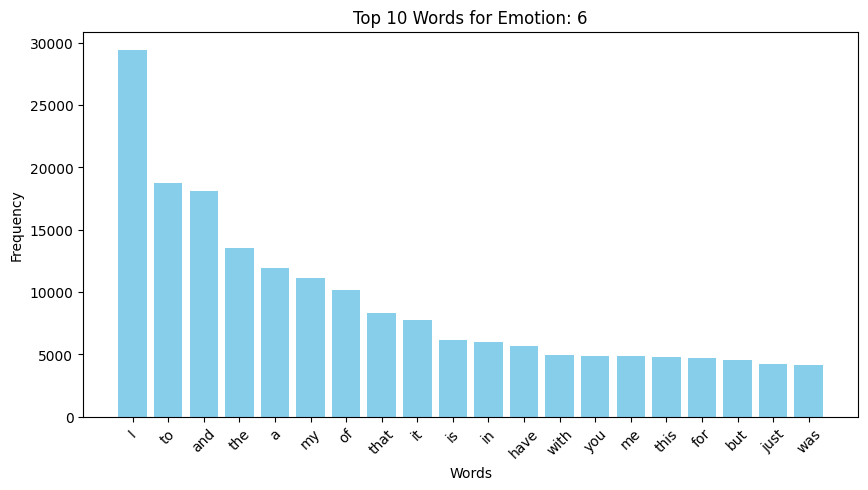

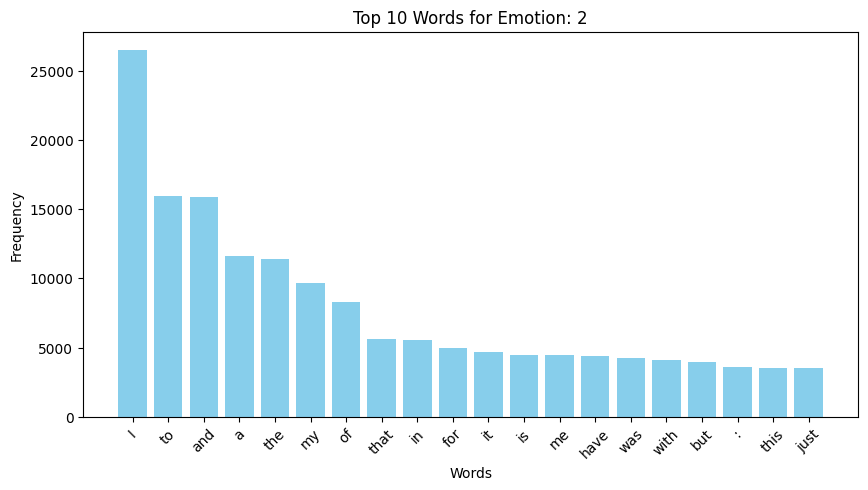

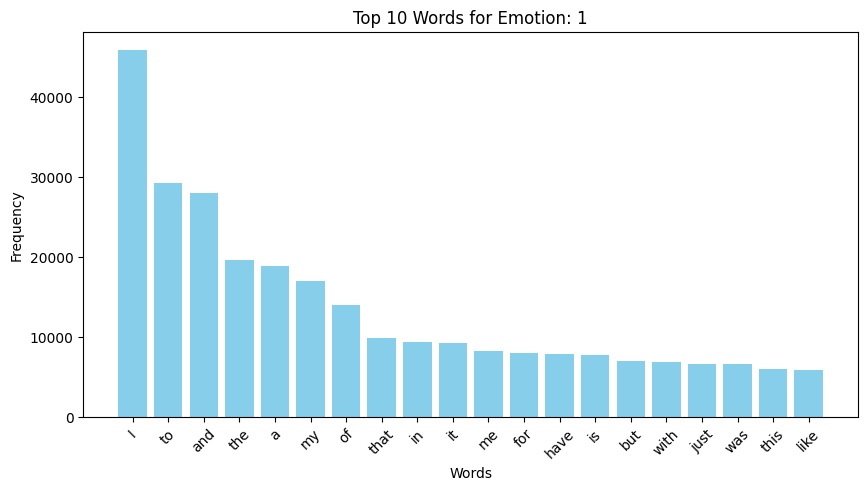

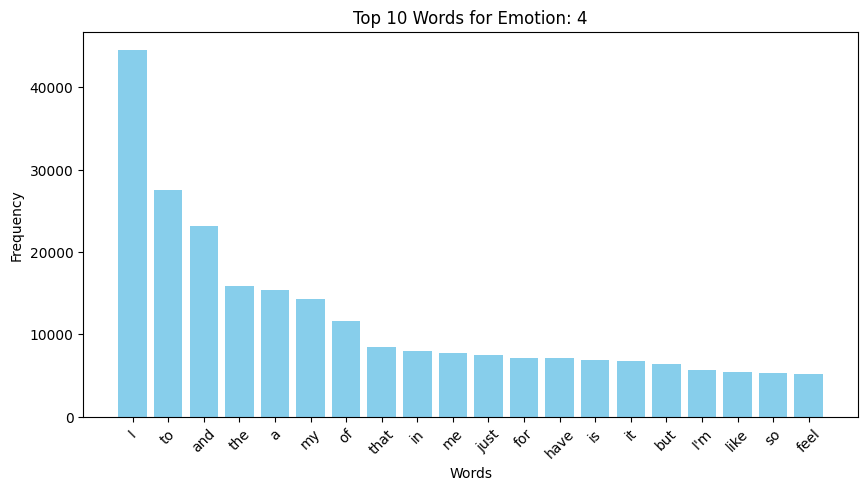

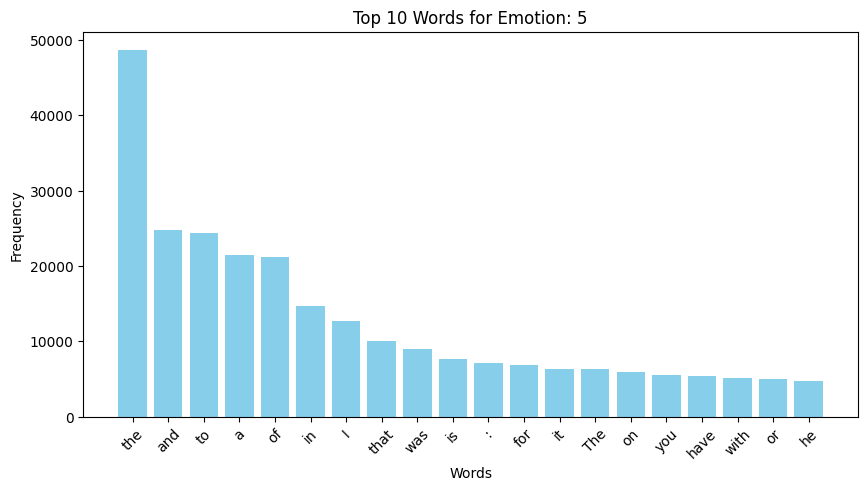

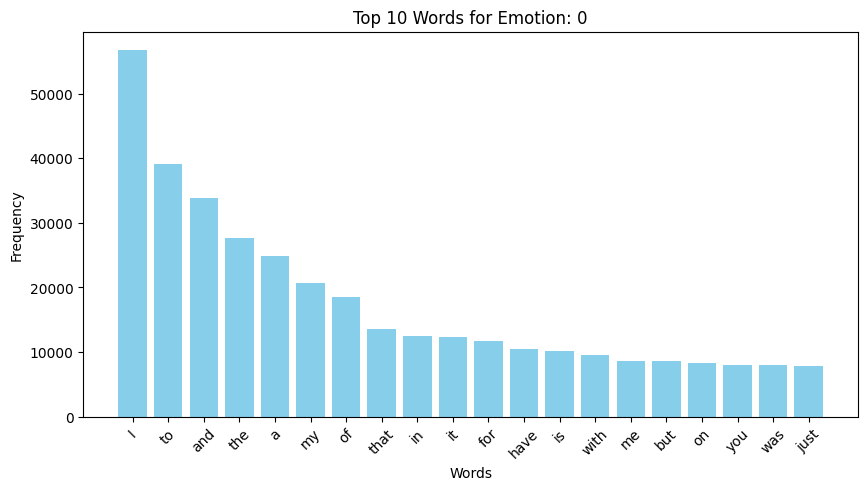

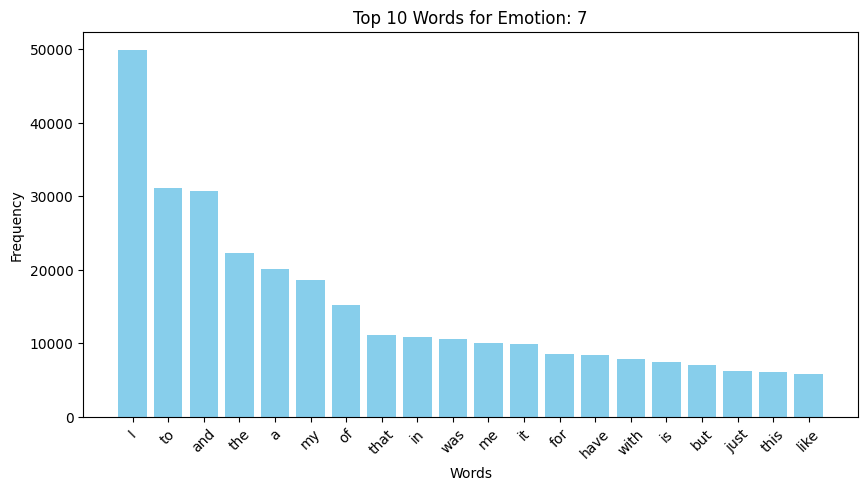

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

emotions = df['label'].unique()


for emotion in emotions:
    text = ' '.join(df[df['label'] == emotion]['text'])
    words = text.split()
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(20)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title(f'Top 10 Words for Emotion: {emotion}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
def clean_text(text):

    text = text.str.lower()
    text = text.str.replace(r'[^\w\s]', '', regex = True)
    text = text.str.replace("\n" , '', regex = True)
    text = text.str.replace('\d', '', regex = True)
    text = text.str.replace(r'\[.*?\]', '', regex = True)
    text = text.str.replace(r'https?://\S+|www\.\S+', '', regex = True)
    text = text.str.replace(r'<.*?>+', '', regex = True)
    text = text.str.replace(r'\w*\d\w*', '', regex = True)
    return text
df["text"] = clean_text(df["text"])

In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import spacy

# власні стоп-слова
#custom_stopwords = {'ocd', 'anxiety', 'adhd','ptsd','bpd','depression','bipolar'}
custom_stopwords = {}
def remove_stopwords(text):

    stop_words = set(stopwords.words('english'))
    stop_words.update(custom_stopwords)
    text = text.apply(lambda x: " ".join(word for word in str(x).split() if word.lower() not in stop_words))
    return text


df["text"] = remove_stopwords(df["text"])
delete = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: " ".join(word for word in x.split() if word.lower() not in delete))

nlp = spacy.load('en_core_web_sm')


In [ ]:
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc])
df['text'] = df['text'].apply(lemmatize_sentence)
df.head()

,text,label
0,fantasize fp : it ? fantasize about ? : fp ? a...,3
1,support subreddit people mental illness . : po...,6
2,scared psychotic symptom : I be try keep remin...,2
4,feel like sick animal need put down . : cat 18...,4
5,constantly check ocd subreddit compulsion ? : ...,6


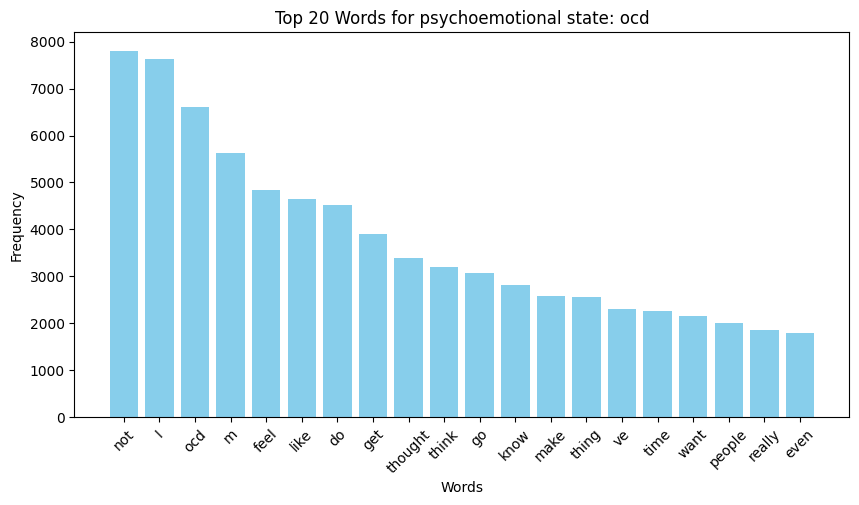

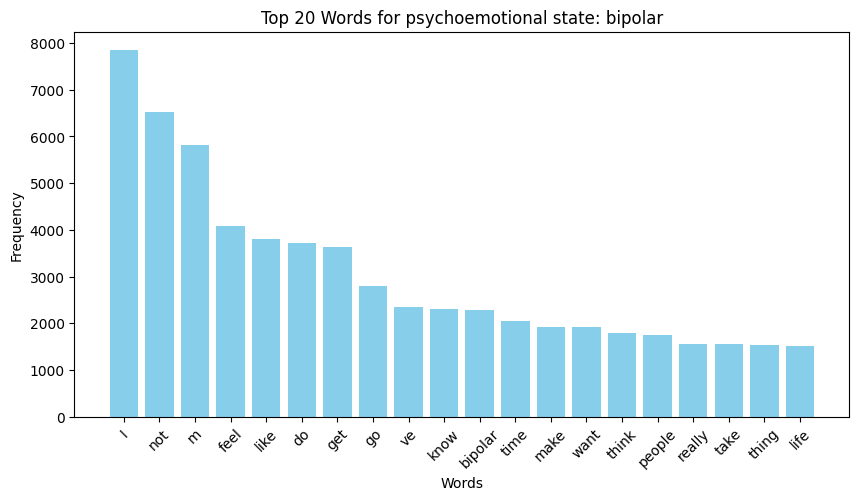

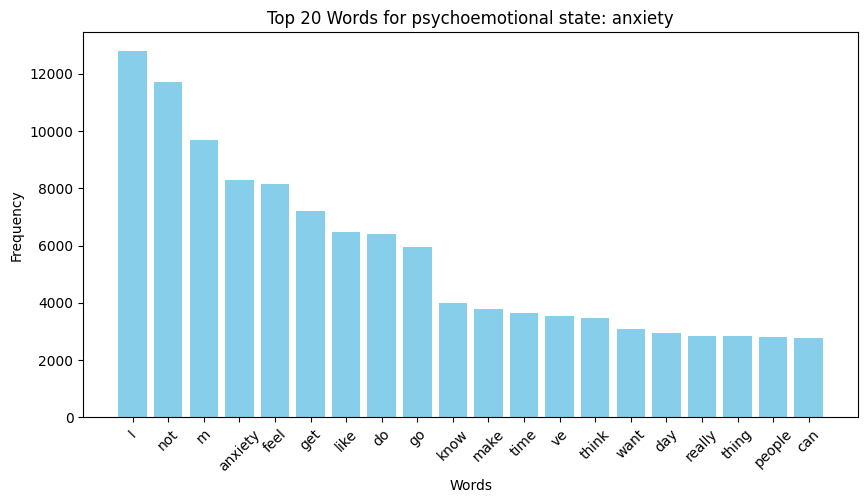

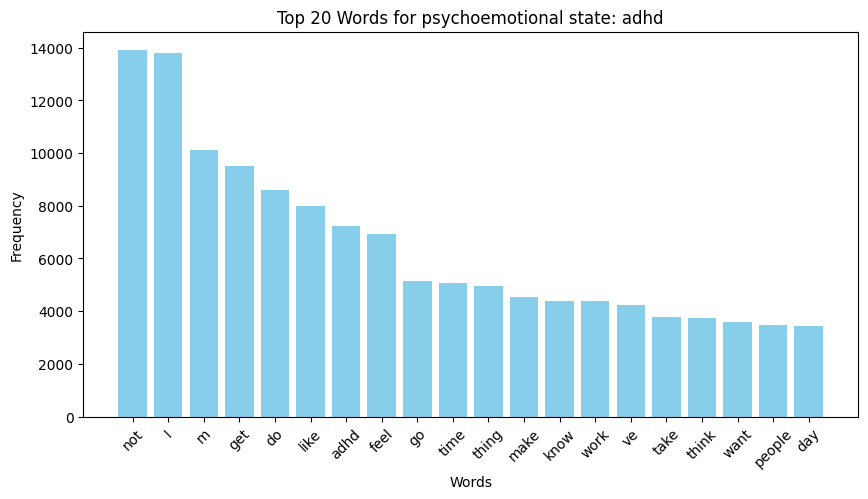

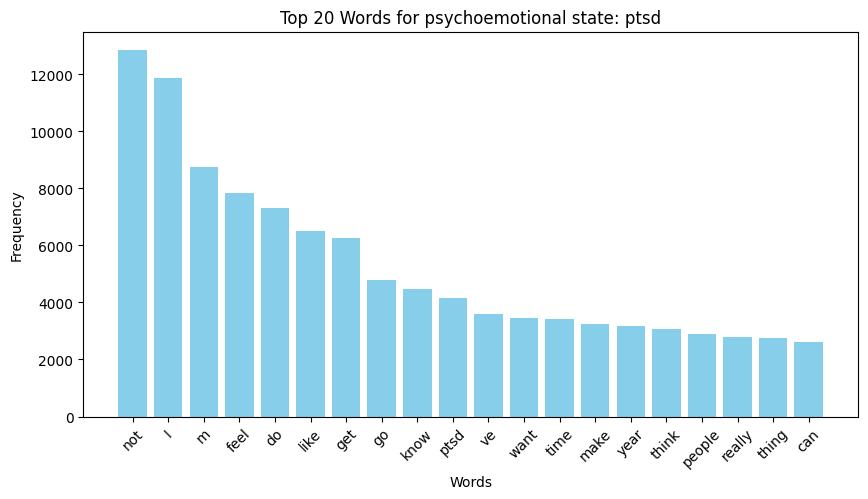

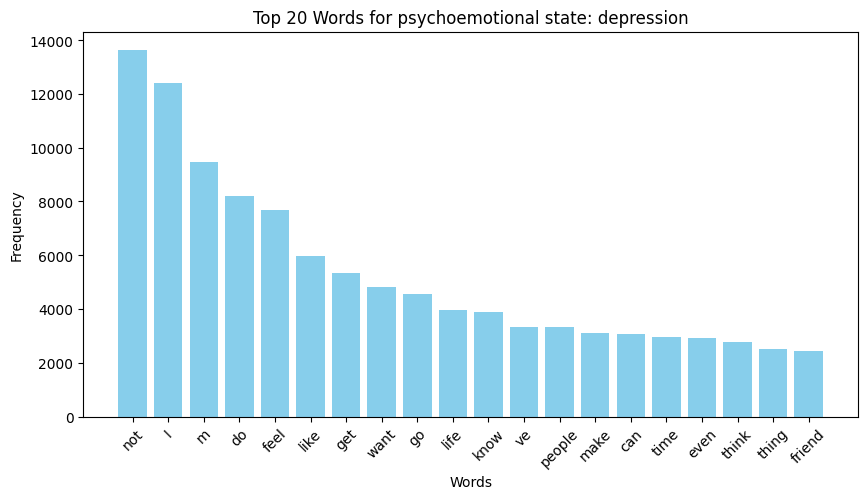

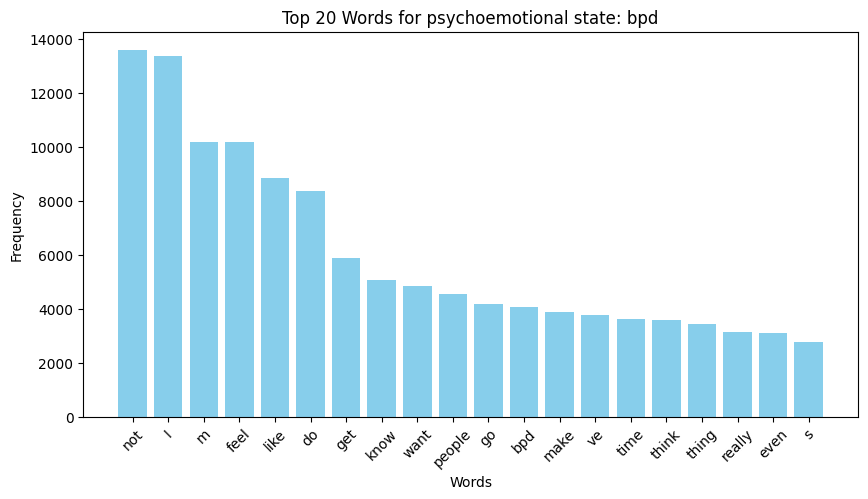

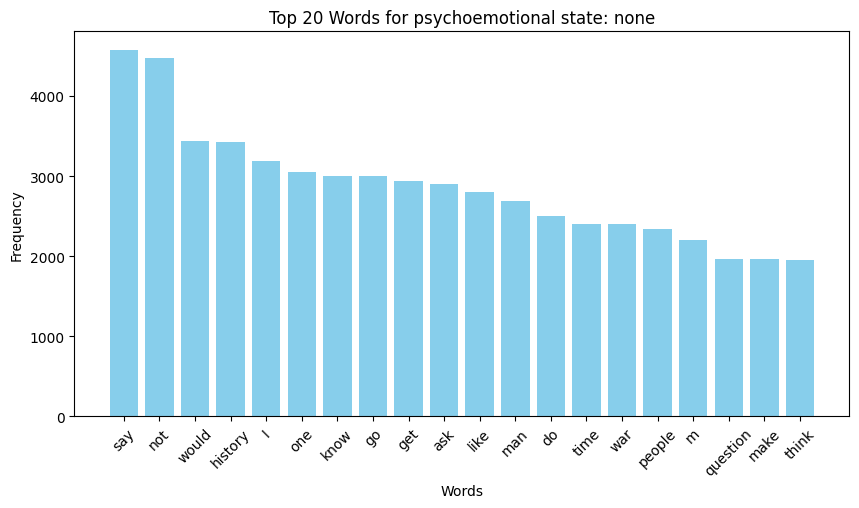

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

emotions = df['label'].unique()
emotions = {6:'ocd',2:"bipolar", 1:'anxiety', 0:'adhd',7:'ptsd',4:'depression',3:'bpd',5:"none"}

for emotion,state in emotions.items():
    text = ' '.join(df[df['label'] == emotion]['text'])
    words = text.split()
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(20)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='skyblue')
    plt.title(f'Top 20 Words for psychoemotional state: {state}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()


In [ ]:
first_text = df['text'].iloc[0]
print(first_text)

fantasize fp fantasize fp attract fp romantic way fantasize fantasy like ill start fp love think love love friend would fantasize we go next level would comfort security like ill take care forever you ll never worry anything ever etcit get point fantasize mildly interfere relationship real life i d rather fantasize actual talk talk far stressful see real life always bite disappointed could never meet standard treat fantasy I ve fantasy like since child feature different imaginary people base movie character whoever crush time even actual boyfriend long always boyfriend child old brother would protect keep safe definitely intertwine feeling clearly think feel insecure abandonment issue ok everyone spill


In [ ]:
df1 = dataset['train'].to_pandas()
first_text = df1['text'].iloc[0]
print(first_text)

Fantasizing about your FP: Do you do it? What do you fantasize about? : Who is your FP? Are you attracted to your FP in a romantic way? Do you fantasize about them? What are the fantasies like? 

Ill start: I had an FP who i was in love with (or thought i was in love with) but he only loved me as a friend. I would fantasize about us "going to the next level"... but it would be more about comfort and security... like "i'll take care of you forever, you'll never have to worry about anything ever again..." etc.
It got to the point where fantasizing about him was mildly interfering with my relationship with him in real life. I'd rather fantasize about him than actual talk to him, because talking to him was far more stressful. And when i saw him in real life, i was always a bit disappointed because he could never meet the standards of how he treated me in the fantasy. 

I've had fantasies like this since i was a child... They feature different imaginary people (based off movie characters or

In [ ]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
X = df['text']
y = df['label']

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_res, y_res = undersampler.fit_resample(X.values.reshape(-1, 1), y)

print("Розподіл класів після балансування:")
print(pd.Series(y_res).value_counts())

balanced_df = pd.DataFrame({
    'text': X_res.flatten(),
    'label': y_res
})

train_df, test_df = train_test_split(balanced_df, test_size=0.2, random_state=42)
print("\nРозподіл класів у тренувальному наборі:")
print(train_df['label'].value_counts())

print("\nРозподіл класів у тестовому наборі:")
print(test_df['label'].value_counts())


Розподіл класів після балансування:
label
0    3257
1    3257
2    3257
3    3257
4    3257
5    3257
6    3257
7    3257
Name: count, dtype: int64

Розподіл класів у тренувальному наборі:
label
5    2624
3    2622
7    2616
6    2615
0    2615
4    2604
1    2586
2    2562
Name: count, dtype: int64

Розподіл класів у тестовому наборі:
label
2    695
1    671
4    653
0    642
6    642
7    641
3    635
5    633
Name: count, dtype: int64


In [ ]:
# train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df['label'].value_counts()

label
5    2624
3    2622
7    2616
6    2615
0    2615
4    2604
1    2586
2    2562
Name: count, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

#  TF-IDF вектори
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_df['text'])
X_test = tfidf_vectorizer.transform(test_df['text'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['label'])
y_test = label_encoder.transform(test_df['label'])

# Логістична регресія
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_classifier.fit(X_train, y_train)
y_test_pred = logistic_regression_classifier.predict(X_test)

# Оцінка на тестовій вибірці
print("Test Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
print(classification_report(y_test, y_test_pred))

Test Set Evaluation:
Accuracy: 0.8004604758250192
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       642
           1       0.81      0.75      0.78       671
           2       0.81      0.70      0.75       695
           3       0.73      0.75      0.74       635
           4       0.66      0.75      0.70       653
           5       0.87      1.00      0.93       633
           6       0.93      0.82      0.87       642
           7       0.82      0.77      0.79       641

    accuracy                           0.80      5212
   macro avg       0.80      0.80      0.80      5212
weighted avg       0.80      0.80      0.80      5212



In [ ]:
pip install transformers torch


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import get_linear_schedule_with_warmup
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_data(texts, tokenizer, max_len):
    return tokenizer(texts, padding=True, truncation=True, max_length=max_len, return_tensors="pt")

max_len = 256

train_encodings = tokenize_data(train_df['text'].tolist(), tokenizer, max_len)
test_encodings = tokenize_data(test_df['text'].tolist(), tokenizer, max_len)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['label'])
y_test = label_encoder.transform(test_df['label'])

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

train_dataset = TextDataset(train_encodings, y_train)
test_dataset = TextDataset(test_encodings, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_)).to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
epochs = 5
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

def train_model(model, train_loader, optimizer, scheduler, device, epochs):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        correct_predictions = 0
        total_predictions = 0
        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            batch = {k: v.to(device) for k, v in batch.items()}

            optimizer.zero_grad()
            outputs = model(**batch)
            loss = outputs.loss
            logits = outputs.logits

            loss.backward()
            optimizer.step()
            scheduler.step()

            total_loss += loss.item()
            predictions = torch.argmax(logits, dim=-1)
            correct_predictions += (predictions == batch['labels']).sum().item()
            total_predictions += batch['labels'].size(0)

        avg_loss = total_loss / len(train_loader)
        accuracy = correct_predictions / total_predictions
        print(f"Epoch {epoch + 1}/{epochs} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

train_model(model, train_loader, optimizer, scheduler, device, epochs)

def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Evaluating"):
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(batch['labels'].cpu().numpy())

    return all_preds, all_labels

y_test_pred, y_test_labels = evaluate_model(model, test_loader, device)
print("BERT Transformer Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_labels, y_test_pred)}")
print(classification_report(y_test_labels, y_test_pred))


Using device: cuda


A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

Epoch 1/5 - Loss: 0.7974, Accuracy: 0.7407


Epoch 2/5: 100%|██████████| 1303/1303 [14:27<00:00,  1.50it/s]


Epoch 2/5 - Loss: 0.4872, Accuracy: 0.8431


Epoch 3/5: 100%|██████████| 1303/1303 [14:28<00:00,  1.50it/s]


Epoch 3/5 - Loss: 0.3207, Accuracy: 0.8999


Epoch 4/5: 100%|██████████| 1303/1303 [14:28<00:00,  1.50it/s]


Epoch 4/5 - Loss: 0.1950, Accuracy: 0.9431


Epoch 5/5: 100%|██████████| 1303/1303 [14:28<00:00,  1.50it/s]


Epoch 5/5 - Loss: 0.1193, Accuracy: 0.9691


Evaluating: 100%|██████████| 326/326 [01:08<00:00,  4.73it/s]

BERT Transformer Model Evaluation:
Accuracy: 0.8200306983883346
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       642
           1       0.77      0.81      0.79       671
           2       0.79      0.75      0.77       695
           3       0.74      0.76      0.75       635
           4       0.73      0.72      0.73       653
           5       0.98      0.99      0.99       633
           6       0.86      0.85      0.86       642
           7       0.82      0.83      0.82       641

    accuracy                           0.82      5212
   macro avg       0.82      0.82      0.82      5212
weighted avg       0.82      0.82      0.82      5212



Using device: cuda
Epoch 1/50, Loss: 1.9094, Accuracy: 0.2410
Epoch 2/50, Loss: 1.5257, Accuracy: 0.4500
Epoch 3/50, Loss: 1.3070, Accuracy: 0.5519
Epoch 4/50, Loss: 1.0134, Accuracy: 0.6618
Epoch 5/50, Loss: 0.8984, Accuracy: 0.7035
Epoch 6/50, Loss: 0.7189, Accuracy: 0.7678
Epoch 7/50, Loss: 0.6417, Accuracy: 0.7934
Epoch 8/50, Loss: 0.5427, Accuracy: 0.8275
Epoch 9/50, Loss: 0.4676, Accuracy: 0.8553
Epoch 10/50, Loss: 0.4069, Accuracy: 0.8749
Epoch 11/50, Loss: 0.3646, Accuracy: 0.8880
Epoch 12/50, Loss: 0.3069, Accuracy: 0.9065
Epoch 13/50, Loss: 0.2644, Accuracy: 0.9228
Epoch 14/50, Loss: 0.2124, Accuracy: 0.9365
Epoch 15/50, Loss: 0.1685, Accuracy: 0.9503
Epoch 16/50, Loss: 0.1428, Accuracy: 0.9585
Epoch 17/50, Loss: 0.1299, Accuracy: 0.9638
Epoch 18/50, Loss: 0.1218, Accuracy: 0.9666
Epoch 19/50, Loss: 0.1072, Accuracy: 0.9704
Epoch 20/50, Loss: 0.0797, Accuracy: 0.9793
Epoch 21/50, Loss: 0.0557, Accuracy: 0.9857
Epoch 22/50, Loss: 0.0527, Accuracy: 0.9862
Epoch 23/50, Loss: 0.0

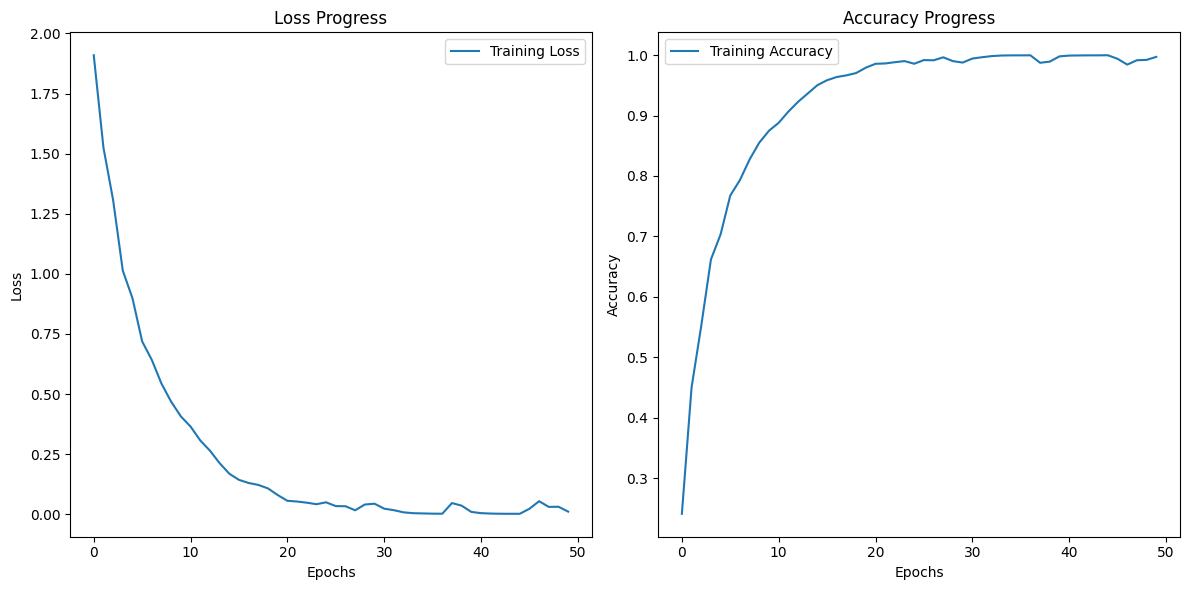

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['text'])

X_train = tokenizer.texts_to_sequences(train_df['text'])
X_test = tokenizer.texts_to_sequences(test_df['text'])

max_len = max(len(x) for x in X_train + X_test)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['label'])
y_test = label_encoder.transform(test_df['label'])

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = torch.tensor(texts, dtype=torch.long)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# LSTM
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, lstm_units, output_dim, dropout_rate):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.lstm = nn.LSTM(embed_dim, lstm_units, batch_first=True, dropout=dropout_rate)
        self.fc = nn.Linear(lstm_units, output_dim)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])
        x = self.fc(x)
        return x


vocab_size = len(tokenizer.word_index) + 1
embed_dim = 100
lstm_units = 100
output_dim = 8
dropout_rate = 0.2

model = LSTMClassifier(vocab_size, embed_dim, lstm_units, output_dim, dropout_rate).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, optimizer, criterion, device, epochs):
    history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}
    for epoch in range(epochs):
        model.train()
        train_loss, correct = 0, 0
        for texts, labels in train_loader:
            texts, labels = texts.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()

        train_acc = correct / len(train_loader.dataset)
        history['loss'].append(train_loss / len(train_loader))
        history['accuracy'].append(train_acc)

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss / len(train_loader):.4f}, Accuracy: {train_acc:.4f}")
    return history

history = train_model(model, train_loader, optimizer, criterion, device, epochs=50)
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for texts, labels in test_loader:
            texts, labels = texts.to(device), labels.to(device)
            outputs = model(texts)
            preds = outputs.argmax(1).cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

y_test_pred, y_test_labels = evaluate_model(model, test_loader, device)

print("LSTM Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_labels, y_test_pred)}")
print(classification_report(y_test_labels, y_test_pred))
def plot_training_progress(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.title('Loss Progress')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.title('Accuracy Progress')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_progress(history)


In [ ]:
from itertools import product
import time


def train_and_evaluate_model(vocab_size, embed_dim, lstm_units, dropout_rate, output_dim, train_loader, test_loader, device, epochs=5):
    model = LSTMClassifier(vocab_size, embed_dim, lstm_units, output_dim, dropout_rate).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    history = {'loss': [], 'accuracy': []}
    for epoch in range(epochs):
        model.train()
        train_loss, correct = 0, 0
        for texts, labels in train_loader:
            texts, labels = texts.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(texts)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
        train_acc = correct / len(train_loader.dataset)
        history['loss'].append(train_loss / len(train_loader))
        history['accuracy'].append(train_acc)
    y_test_pred, y_test_labels = evaluate_model(model, test_loader, device)
    accuracy = accuracy_score(y_test_labels, y_test_pred)

    return accuracy, history


def grid_search(train_loader, test_loader, vocab_size, output_dim, device):
    embed_dims = [150, 100]
    lstm_units = [150, 100]
    dropout_rates = [0.2, 0.5]
    epochs = 20

    best_params = None
    best_accuracy = 0
    results = []

    param_combinations = list(product(embed_dims, lstm_units, dropout_rates))

    print(f"Total combinations to test: {len(param_combinations)}")
    for embed_dim, lstm_unit, dropout_rate in param_combinations:
        print(f"Testing combination: embed_dim={embed_dim}, lstm_units={lstm_unit}, dropout_rate={dropout_rate}")

        start_time = time.time()
        accuracy, _ = train_and_evaluate_model(
            vocab_size=vocab_size,
            embed_dim=embed_dim,
            lstm_units=lstm_unit,
            dropout_rate=dropout_rate,
            output_dim=output_dim,
            train_loader=train_loader,
            test_loader=test_loader,
            device=device,
            epochs=epochs
        )
        end_time = time.time()

        print(f"Accuracy: {accuracy:.4f}, Time: {end_time - start_time:.2f}s\n")

        results.append((embed_dim, lstm_unit, dropout_rate, accuracy))

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = (embed_dim, lstm_unit, dropout_rate)

    print(f"Best Accuracy: {best_accuracy:.4f}")
    print(f"Best Parameters: embed_dim={best_params[0]}, lstm_units={best_params[1]}, dropout_rate={best_params[2]}")
    return results, best_params

# Виклик Grid Search
results, best_params = grid_search(
    train_loader=train_loader,
    test_loader=test_loader,
    vocab_size=vocab_size,
    output_dim=output_dim,
    device=device
)

# Візуалізація результатів Grid Search
def visualize_grid_search_results(results):
    embed_dims = sorted(set(r[0] for r in results))
    lstm_units = sorted(set(r[1] for r in results))
    dropout_rates = sorted(set(r[2] for r in results))

    for embed_dim in embed_dims:
        plt.figure(figsize=(10, 6))
        for dropout_rate in dropout_rates:
            subset = [r[3] for r in results if r[0] == embed_dim and r[2] == dropout_rate]
            plt.plot(lstm_units, subset, label=f"Dropout={dropout_rate}")
        plt.title(f"Accuracy for Embedding Dim {embed_dim}")
        plt.xlabel("LSTM Units")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid()
        plt.show()

visualize_grid_search_results(results)


Total combinations to test: 8
Testing combination: embed_dim=150, lstm_units=150, dropout_rate=0.2
Accuracy: 0.7421, Time: 360.19s

Testing combination: embed_dim=150, lstm_units=150, dropout_rate=0.5
Accuracy: 0.7412, Time: 358.90s

Testing combination: embed_dim=150, lstm_units=100, dropout_rate=0.2


KeyboardInterrupt: 